In [ ]:
#install transformers
pip install transformers

     |████████████████████████████████| 2.1MB 6.7MB/s 
     |████████████████████████████████| 901kB 22.1MB/s 
     |████████████████████████████████| 3.3MB 35.9MB/s 


In [ ]:
#import some libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the data
df_train = pd.read_csv('/content/drive/MyDrive/emoji/train_h.csv')
df_val = pd.read_csv('/content/drive/MyDrive/emoji/valid_h.csv')
df_test = pd.read_csv('/content/drive/MyDrive/emoji/test_h.csv')

In [ ]:
df_test.head

<bound method NDFrame.head of                                                     text  label
0                                      en Pelham Parkway      2
1      The calm before...... | w/ sofarsounds @user |...     10
2      Just witnessed the great solar eclipse @ Tampa...      6
3      This little lady is 26 weeks pregnant today! E...      1
4      Great road trip views! @ Shartlesville, Pennsy...     16
...                                                  ...    ...
49995  @user @user @user #la #westhollywood #dtboy #l...      5
49996  Climbing subway stairs. That was nothing. #sta...     19
49997  Pops with Ms Drina at The Swanees Anniversary ...      6
49998  We love ️ Soren! July 26, 2017 was her first d...      0
49999  Waiting in line for #TheRoom ! #PrepareForDisa...      2

[50000 rows x 2 columns]>

In [ ]:
df_test.columns

Index(['text', 'label'], dtype='object')

In [ ]:
#data preprocessing (removing links and unnecessary letters like #,@)
import re
for i in range(len(df_train['text'])):
  df_train['text'][i]=re.sub(r'http\S+', '', df_train['text'][i]) 
  df_train['text'][i]=re.sub("[^a-zA-Z]", " ", df_train['text'][i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#data preprocessing (removing links and unnecessary letters like #,@)
import re
for i in range(len(df_val['text'])):
  df_val['text'][i]=re.sub(r'http\S+', '', df_val['text'][i]) 
  df_val['text'][i]=re.sub("[^a-zA-Z]", " ", df_val['text'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_val

,text,label
0,A little throwback with my favourite person ...,0
1,glam on user yesterday for kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then amp Now VILO Walt Disney Magic Kingdom,0
4,Who never A Galaxy Far Far Away,2
...,...,...
4995,don t know what I d do without you Keene Sta...,0
4996,Senior night with my little Bailey So proud...,3
4997,Real friends or labeled as family BrotherMan...,6
4998,It makes me so happy meet people wearing hats ...,3


In [ ]:
#data preprocessing (removing links and unnecessary letters like #,@)
import re
for i in range(len(df_test['text'])):
  df_test['text'][i]=re.sub(r'http\S+', '', df_test['text'][i]) 
  df_test['text'][i]=re.sub("[^a-zA-Z]", " ", df_test['text'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#install bert for tensorflow2
pip install bert-for-tf2

     |████████████████████████████████| 51kB 4.5MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=26c6d67ddf3ab268d20e02bf62b51579e62d54944ff754a5bd24b0204fc29bc1
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=15dd62ca504366ae3ebe7646d1c33a0fb2c0c9bd3b77f8b8dd52591cf9d6420d
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=5452b7e929d3e0dd25636549b96989d71f7462baa1c7d71f298b467f84c81bab
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [ ]:
import os
import math
import datetime
from tqdm import tqdm 
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 

import bert 
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer
import seaborn as sns

from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#define the class for BERT
class EmojiDetectionData:
  DATA_COLUMN = "text"
  LABEL_COLUMN = "label"

  def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=192):
    self.tokenizer = tokenizer
    self.max_seq_len = 0
    self.classes = classes
    
    train, test = map(lambda df: df.reindex(df[EmojiDetectionData.DATA_COLUMN].str.len().sort_values().index), [train, test])
    
    ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

    print("max seq_len", self.max_seq_len)
    self.max_seq_len = min(self.max_seq_len, max_seq_len)
    self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

  def _prepare(self, df):
    x, y = [], []
    
    for _, row in tqdm(df.iterrows()):
      text, label = row[EmojiDetectionData.DATA_COLUMN], row[EmojiDetectionData.LABEL_COLUMN]
      tokens = self.tokenizer.tokenize(text)
      tokens = ["[CLS]"] + tokens + ["[SEP]"]
      token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
      self.max_seq_len = max(self.max_seq_len, len(token_ids))
      x.append(token_ids)
      y.append(self.classes.index(label))

    return np.array(x), np.array(y)

  def _pad(self, ids):
    x = []
    for input_ids in ids:
      input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
      input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
      x.append(np.array(input_ids))
    return np.array(x)



In [ ]:
#creating BERT model
def create_model(max_seq_len, bert_config_file, bert_ckpt_file):
    with tf.io.gfile.GFile(bert_config_file, 'r') as reader:
        bc = StockBertConfig.from_json_string(reader.read())
    bert_params = map_stock_config_to_params(bc)
    bert_params.adapter_size = None
    bert = BertModelLayer.from_params(bert_params, name = 'bert')
    
    input_ids = keras.layers.Input(shape = (max_seq_len, ), dtype='int32', name='input_ids')
    bert_output = bert(input_ids)
    
    print('bert_shape', bert_output.shape)
    
    cls_out = keras.layers.Lambda(lambda seq: seq[:,0,:]) (bert_output)
    cls_out = keras.layers.Dropout(0.5)(cls_out)
    logits = keras.layers.Dense(units=768, activation='tanh')(cls_out)
    logits = keras.layers.Dropout(0.5)(logits)
    logits = keras.layers.Dense(units=len(classes), activation='softmax')(cls_out)
    
    model = keras.Model(inputs = input_ids, outputs= logits)
    model.build(input_shape=(None, max_seq_len))
    
    load_stock_weights(bert, bert_ckpt_file)
    
    return model

In [ ]:
def plot_graphs(f, history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [ ]:
RANDOM_SEED = 42
lr = 0.000010
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

train = df_train
valid = df_val
test = df_test

train = train.append(valid).reset_index(drop=True)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19')]

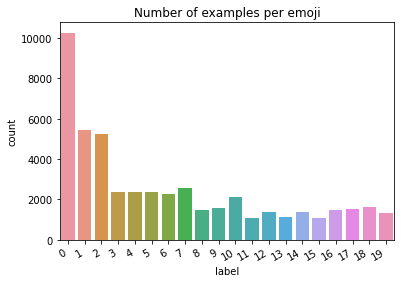

In [ ]:
#frequency of train data for each class
chart = sns.countplot(train.label)
plt.title("Number of examples per emoji")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 30, horizontalalignment= 'right')

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19')]

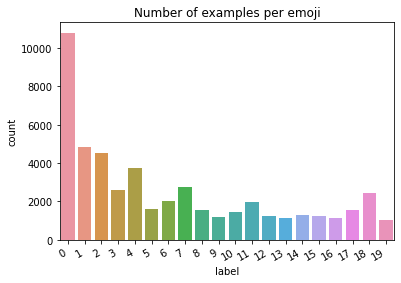

In [ ]:
#frequency of test data for each class
chart = sns.countplot(test.label)
plt.title("Number of examples per emoji")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 30, horizontalalignment= 'right')

In [ ]:
#loading the model
bert_model_name = 'uncased_L-12_H-768_A-12'
bert_ckpt_dir = os.path.join('/content/drive/MyDrive/BERT Models/', bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, 'bert_model.ckpt')
bert_config_file = os.path.join(bert_ckpt_dir, 'bert_config.json')
tokenizer = FullTokenizer(vocab_file= os.path.join(bert_ckpt_dir, 'vocab.txt'))


classes = train.label.unique().tolist()

data = EmojiDetectionData(train, test, tokenizer, classes, max_seq_len=128)
model = create_model(data.max_seq_len, bert_config_file, bert_ckpt_file)

model.summary()

50000it [00:17, 2903.94it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
50000it [00:17, 2843.38it/s]


max seq_len 41
bert_shape (None, 41, 768)
Done loading 196 BERT weights from: /content/drive/MyDrive/BERT Models/uncased_L-12_H-768_A-12/bert_model.ckpt into <bert.model.BertModelLayer object at 0x7eff61211ed0> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 41)]              0         
_________________________________________________________________
bert (BertM

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(lr),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [keras.metrics.SparseCategoricalAccuracy(name='acc')]
)


In [ ]:
#tuning hyperparameters with BERT-base by batch size
history = model.fit(
    x = data.train_x,
    y = data.train_y,
    validation_split = 0.1,
    batch_size = 16,
    shuffle = True,
    epochs = 5
)

Epoch 1/5
2813/2813 [==============================] - 2587s 913ms/step - loss: 2.7749 - acc: 0.1995 - val_loss: 2.3030 - val_acc: 0.3316
Epoch 2/5
2813/2813 [==============================] - 2536s 902ms/step - loss: 2.3830 - acc: 0.3047 - val_loss: 2.2098 - val_acc: 0.3478
Epoch 3/5
2813/2813 [==============================] - 2562s 911ms/step - loss: 2.1920 - acc: 0.3561 - val_loss: 2.1937 - val_acc: 0.3524
Epoch 4/5
2813/2813 [==============================] - 2545s 905ms/step - loss: 2.0075 - acc: 0.4005 - val_loss: 2.2310 - val_acc: 0.3548
Epoch 5/5
2813/2813 [==============================] - 2538s 902ms/step - loss: 1.8498 - acc: 0.4416 - val_loss: 2.3101 - val_acc: 0.3386


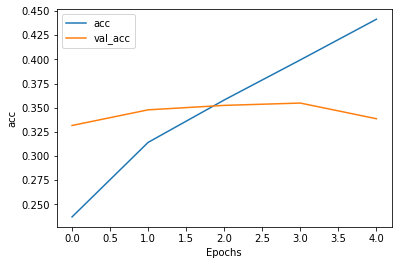

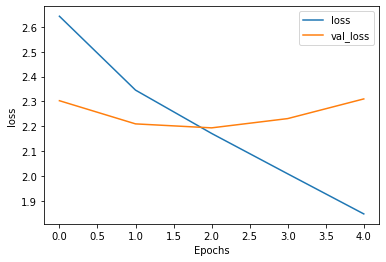

In [ ]:
#plotting accuracy vs val_accuracy and loss vs val_loss
f1 = plt.figure()
plot_graphs(f1,history, "acc")
f2 = plt.figure()
plot_graphs(f2,history, "loss")

In [ ]:
_, test_acc = model.evaluate(data.test_x, data.test_y)
y_pred = model.predict(data.test_x).argmax(axis=-1)

1563/1563 [==============================] - 723s 463ms/step - loss: 2.3187 - acc: 0.3415


In [ ]:
#classification result
print(classification_report(data.test_y, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.47      0.35      1265
           1       0.06      0.01      0.01      1010
           2       0.39      0.61      0.47     10798
           3       0.32      0.52      0.40      4534
           4       0.54      0.49      0.52      1949
           5       0.25      0.30      0.27      2749
           6       0.27      0.28      0.27      4830
           7       0.13      0.07      0.09      1175
           8       0.54      0.45      0.49      3716
           9       0.26      0.06      0.10      1549
          10       0.11      0.08      0.10      1613
          11       0.20      0.31      0.25      1432
          12       0.12      0.06      0.08      1306
          13       0.05      0.00      0.01      1153
          14       0.40      0.07      0.12      2417
          15       0.17      0.13      0.14      1996
          16       0.59      0.03      0.05      1114
          17       0.25    

In [ ]:
#tuning hyperparameters with BERT-base by batch size
history = model.fit(
    x = data.train_x,
    y = data.train_y,
    validation_split = 0.1,
    batch_size = 32,
    shuffle = True,
    epochs = 5
)

Epoch 1/5
1407/1407 [==============================] - 2532s 2s/step - loss: 2.8218 - acc: 0.1852 - val_loss: 2.3360 - val_acc: 0.3238
Epoch 2/5
1407/1407 [==============================] - 2389s 2s/step - loss: 2.4416 - acc: 0.2875 - val_loss: 2.2186 - val_acc: 0.3488
Epoch 3/5
1407/1407 [==============================] - 2411s 2s/step - loss: 2.2679 - acc: 0.3365 - val_loss: 2.2112 - val_acc: 0.3422
Epoch 4/5
1407/1407 [==============================] - 2397s 2s/step - loss: 2.1416 - acc: 0.3647 - val_loss: 2.2043 - val_acc: 0.3556
Epoch 5/5
1407/1407 [==============================] - 2408s 2s/step - loss: 2.0153 - acc: 0.3952 - val_loss: 2.2269 - val_acc: 0.3534


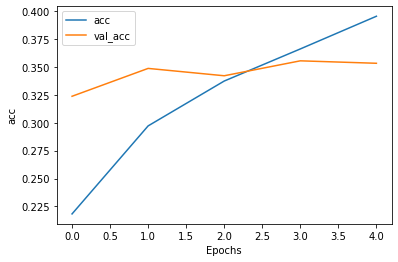

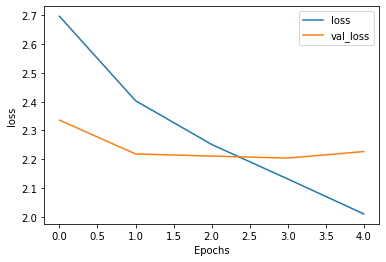

In [ ]:
#plotting accuracy vs val_accuracy and loss vs val_loss
f1 = plt.figure()
plot_graphs(f1,history, "acc")
f2 = plt.figure()
plot_graphs(f2,history, "loss")

In [ ]:
_, test_acc = model.evaluate(data.test_x, data.test_y)
y_pred = model.predict(data.test_x).argmax(axis=-1)

1563/1563 [==============================] - 916s 586ms/step - loss: 2.2433 - acc: 0.3485


In [ ]:
#classification result
print(classification_report(data.test_y, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.47      0.36      1265
           1       0.05      0.00      0.00      1010
           2       0.37      0.66      0.47     10798
           3       0.34      0.53      0.41      4534
           4       0.57      0.47      0.52      1949
           5       0.27      0.28      0.27      2749
           6       0.28      0.25      0.27      4830
           7       0.14      0.05      0.07      1175
           8       0.58      0.41      0.48      3716
           9       0.32      0.06      0.09      1549
          10       0.12      0.11      0.11      1613
          11       0.21      0.30      0.25      1432
          12       0.13      0.05      0.08      1306
          13       0.09      0.02      0.03      1153
          14       0.41      0.14      0.20      2417
          15       0.16      0.10      0.13      1996
          16       0.51      0.02      0.03      1114
          17       0.28    

In [ ]:
#tuning hyperparameters with BERT-base by cahnging number of epochs
history = model.fit(
    x = data.train_x,
    y = data.train_y,
    validation_split = 0.1,
    batch_size = 32,
    shuffle = True,
    epochs = 6
)

Epoch 1/6
1407/1407 [==============================] - 2540s 2s/step - loss: 1.8971 - acc: 0.4249 - val_loss: 2.2696 - val_acc: 0.3478
Epoch 2/6
1407/1407 [==============================] - 2563s 2s/step - loss: 1.7601 - acc: 0.4643 - val_loss: 2.3444 - val_acc: 0.3466
Epoch 3/6
1407/1407 [==============================] - 2557s 2s/step - loss: 1.6092 - acc: 0.5046 - val_loss: 2.4489 - val_acc: 0.3330
Epoch 4/6
1407/1407 [==============================] - 2559s 2s/step - loss: 1.4653 - acc: 0.5460 - val_loss: 2.6723 - val_acc: 0.3152
Epoch 5/6
1407/1407 [==============================] - 2561s 2s/step - loss: 1.3142 - acc: 0.5892 - val_loss: 2.8114 - val_acc: 0.3140
Epoch 6/6
1407/1407 [==============================] - 2566s 2s/step - loss: 1.1706 - acc: 0.6305 - val_loss: 3.0108 - val_acc: 0.3006


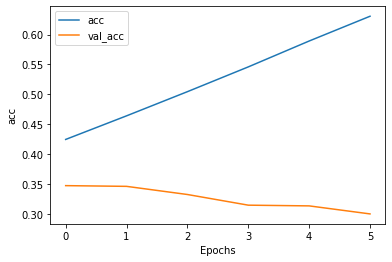

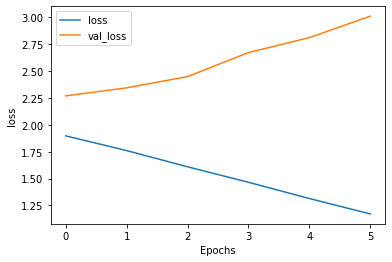

In [ ]:
#plotting accuracy vs val_accuracy and loss vs val_loss
f1 = plt.figure()
plot_graphs(f1,history, "acc")
f2 = plt.figure()
plot_graphs(f2,history, "loss")

In [ ]:
_, test_acc = model.evaluate(data.test_x, data.test_y)
y_pred = model.predict(data.test_x).argmax(axis=-1)

1563/1563 [==============================] - 672s 428ms/step - loss: 3.1594 - acc: 0.0466


In [ ]:
#classification result
print(classification_report(data.test_y, y_pred))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01      1265
           1       0.01      0.00      0.00      1010
           2       0.17      0.00      0.01     10798
           3       0.08      0.01      0.02      4534
           4       0.05      0.16      0.08      1949
           5       0.05      0.26      0.08      2749
           6       0.00      0.00      0.00      4830
           7       0.00      0.00      0.00      1175
           8       0.13      0.01      0.02      3716
           9       0.00      0.00      0.00      1549
          10       0.03      0.08      0.04      1613
          11       0.02      0.01      0.01      1432
          12       0.03      0.02      0.02      1306
          13       0.03      0.00      0.00      1153
          14       0.00      0.00      0.00      2417
          15       0.03      0.03      0.03      1996
          16       0.00      0.00      0.00      1114
          17       0.05    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#tuning hyperparameters with BERT-base by changing shuffle to false
history = model.fit(
    x = data.train_x,
    y = data.train_y,
    validation_split = 0.1,
    batch_size = 32,
    shuffle = False,
    epochs = 5
)

Epoch 1/5
1407/1407 [==============================] - 2033s 1s/step - loss: 3.0790 - acc: 0.1384 - val_loss: 2.6885 - val_acc: 0.2526
Epoch 2/5
1407/1407 [==============================] - 1905s 1s/step - loss: 2.9319 - acc: 0.1556 - val_loss: 2.6882 - val_acc: 0.2524
Epoch 3/5
1407/1407 [==============================] - 1904s 1s/step - loss: 2.8813 - acc: 0.1674 - val_loss: 2.6836 - val_acc: 0.2524
Epoch 4/5
1407/1407 [==============================] - 1898s 1s/step - loss: 2.8541 - acc: 0.1761 - val_loss: 2.6759 - val_acc: 0.2524
Epoch 5/5
1407/1407 [==============================] - 1905s 1s/step - loss: 2.8307 - acc: 0.1819 - val_loss: 2.6837 - val_acc: 0.2524


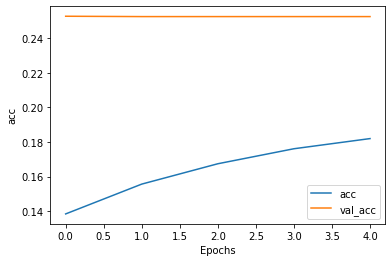

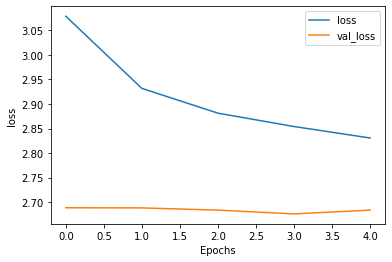

In [ ]:
#plotting accuracy vs val_accuracy and loss vs val_loss
f1 = plt.figure()
plot_graphs(f1,history, "acc")
f2 = plt.figure()
plot_graphs(f2,history, "loss")

In [ ]:
_, test_acc = model.evaluate(data.test_x, data.test_y)
y_pred = model.predict(data.test_x).argmax(axis=-1)

1563/1563 [==============================] - 711s 455ms/step - loss: 2.7771 - acc: 0.2160


In [ ]:
#classification result
print(classification_report(data.test_y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1265
           1       0.00      0.00      0.00      1010
           2       0.22      1.00      0.36     10798
           3       0.00      0.00      0.00      4534
           4       0.00      0.00      0.00      1949
           5       0.00      0.00      0.00      2749
           6       0.00      0.00      0.00      4830
           7       0.00      0.00      0.00      1175
           8       0.00      0.00      0.00      3716
           9       0.00      0.00      0.00      1549
          10       0.00      0.00      0.00      1613
          11       0.00      0.00      0.00      1432
          12       0.00      0.00      0.00      1306
          13       0.00      0.00      0.00      1153
          14       0.00      0.00      0.00      2417
          15       0.00      0.00      0.00      1996
          16       0.00      0.00      0.00      1114
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
